<a href="https://colab.research.google.com/github/Farrelino77/Metnum_Pertemuan13_Bagas-Farrelino-H.P/blob/main/Metnum_Pertemuan13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N: 10, Pi Approximation: 3.1399259889071587, RMS Error: 0.0016666646826344333, Execution Time: 0.0018219947814941406
N: 100, Pi Approximation: 3.1415759869231277, RMS Error: 1.6666666665443586e-05, Execution Time: 0.00010275840759277344
N: 1000, Pi Approximation: 3.141592486923127, RMS Error: 1.6666666624587378e-07, Execution Time: 6.365776062011719e-05
N: 10000, Pi Approximation: 3.1415926519231268, RMS Error: 1.6666663604780751e-09, Execution Time: 0.00010085105895996094


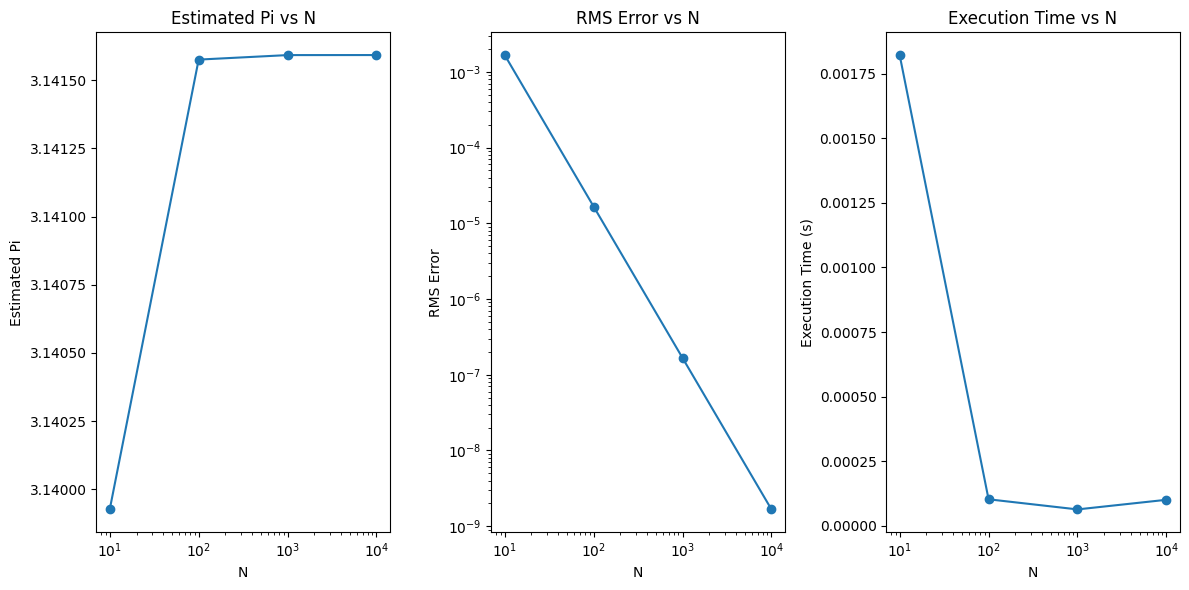

In [2]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt


# Fungsi untuk integrasi
def f(x):
    return 4 / (1 + x**2)

# Metode integrasi trapezoid
def trapezoid_integration(f, a, b, N):
    x = np.linspace(a, b, N+1)
    y = f(x)
    h = (b - a) / N
    integral = (h / 2) * np.sum(y[:-1] + y[1:])
    return integral

# Menghitung galat RMS
def rms_error(approximation, reference):
    return np.sqrt((approximation - reference) ** 2)

# Nilai referensi pi
pi_reference = 3.14159265358979323846

# Variasi nilai N
N_values = [10, 100, 1000, 10000]

# Hasil pengujian
results = []

for N in N_values:
    start_time = time.time()
    pi_approx = trapezoid_integration(f, 0, 1, N)
    end_time = time.time()
    error = rms_error(pi_approx, pi_reference)
    execution_time = end_time - start_time
    results.append((N, pi_approx, error, execution_time))

# Mencetak hasil pengujian
for N, pi_approx, error, execution_time in results:
    print(f"N: {N}, Pi Approximation: {pi_approx}, RMS Error: {error}, Execution Time: {execution_time}")

# Plotting hasil
Ns = [result[0] for result in results]
pis = [result[1] for result in results]
errors = [result[2] for result in results]
times = [result[3] for result in results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(Ns, pis, marker='o')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi vs N')

plt.subplot(1, 3, 2)
plt.plot(Ns, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('RMS Error')
plt.title('RMS Error vs N')

plt.subplot(1, 3, 3)
plt.plot(Ns, times, marker='o')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs N')

plt.tight_layout()
plt.show()
